In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/research/Hyundai/codes
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch_geometric
import random
import matplotlib.pyplot as plt
import numpy as np
import utils
import trainer
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/Hyundai/codes
2.5.1+cu121


In [ ]:
class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

for args in [
        {'num_layers': 15,
         'batch_size': 2,
         'hidden_dim': 32,
         'epochs': 2,
         'seed':42,
         'opt': 'adam',
         'opt_scheduler': 'none',
         'opt_restart': 0,
         'weight_decay': 5e-4,
         'lr': 0.001,
         'train_size': 107,
         'test_size': 28,
         'device':'cuda',
         'shuffle': True,
         'save_best_model': False,
         'checkpoint_dir': "checkpoint/",
         },
    ]:
        args = objectview(args)
dataset_full_timesteps = torch.load("dataset_pt/dataset5_135samples_withload_outerindex_107_28.pt")
dataset = dataset_full_timesteps[:args.train_size+args.test_size]
if args.shuffle:
    random.shuffle(dataset)

stats_list = utils.get_stats(dataset)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
args.device = device
print(device)

cpu


In [ ]:
dataset[0]

Data(x=[35518, 6], edge_index=[2, 213348], edge_attr=[213348, 4], cells=[71116, 3], stress=[35518, 1], top2_index=[510], outerspoke_index=[25478], top30_index_new=[7134], name='81_71_CSV_BC3N_PROTO_18IN_DYN_IMP_0_v2024_')

In [ ]:
test_losses, losses, best_model, best_test_loss, test_loader = trainer.train(dataset, device, stats_list, args)

Training:   0%|          | 0/2 [04:47<?, ?Epochs/s]


KeyboardInterrupt: 

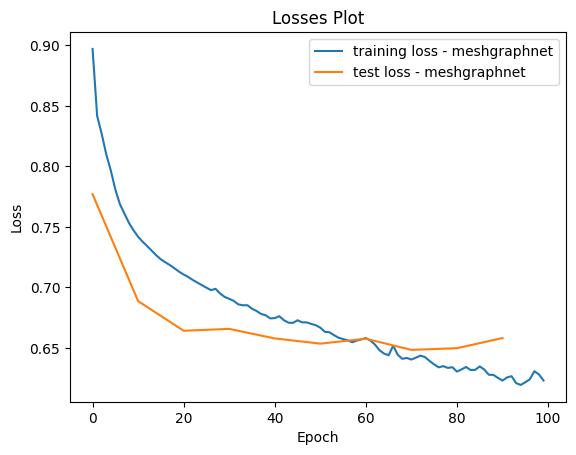

In [ ]:
f = plt.figure()
plt.title('Losses Plot')
plt.plot(losses, label="training loss" + " - " + args.model_type)
x=np.array(list(range(len(test_losses))))*10
plt.plot(x.tolist(),test_losses, label="test loss" + " - " + args.model_type)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()